# One variable regression

## Imports

In [1]:
import sys
sys.path.append("../")  # append the parent directory

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from src.cost_function import quadratic_error
from src.optimizer import GradientDescent
from src.preprocess import feature_normalize, add_intercept_term

## Loading data

In [3]:
file_path = "data/one_var_house_data.txt"
file = Path(Path.cwd()).parent / file_path
file

WindowsPath('C:/Users/moise/Documents/ProjetosGIT/linear-regression/data/one_var_house_data.txt')

In [4]:
with open(file) as fp:
    data = np.genfromtxt(fp, delimiter=',')
    
print(type(data), data.shape)

<class 'numpy.ndarray'> (97, 2)


In [5]:
X = data[:, 0]
y = data[:, 1]
print(X.shape, y.shape)

(97,) (97,)


## Shaping data

In [6]:
m = data.shape[0]
n = data.shape[1] - 1

X = X.reshape((m, n))
y = y.reshape((m, 1))
print(X.shape, y.shape)

(97, 1) (97, 1)


## Preprocessing data

In [7]:
X, mean, std = feature_normalize(X)
print(X.shape, mean, std)

(97, 1) 8.159799999999999 3.8498839959227156


In [8]:
# adding intercept term
X = add_intercept_term(X)
X.shape

(97, 2)

In [9]:
X[:5, :]

array([[ 1.        , -0.53240565],
       [ 1.        , -0.68368294],
       [ 1.        ,  0.09319761],
       [ 1.        , -0.30042464],
       [ 1.        , -0.5974206 ]])

In [10]:
y[:5]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233]])

## Regression using Gradient Descent

In [11]:
theta = np.zeros((n+1, 1))  # regression parameter
theta

array([[0.],
       [0.]])

In [12]:
# setting learning rate (alpha), maximum iterations (max_iter) and tolerance for optimization
grad_desc = GradientDescent(alpha=1e-2, max_iter=1000, tolerance=1e-8)
grad_desc.__dict__

{'alpha': 0.01, 'max_iter': 1000, 'tolerance': 1e-08}

In [13]:
final_theta, cost_hist = grad_desc.optimize(X, y, theta, cost_function=quadratic_error)

stop by tolerance criteria: -9.920435140031714e-09 < 1e-08
End of optimize: iter 889 - cost [[4.47697186]] - theta [[5.83836586 4.59243609]]


## Plotting

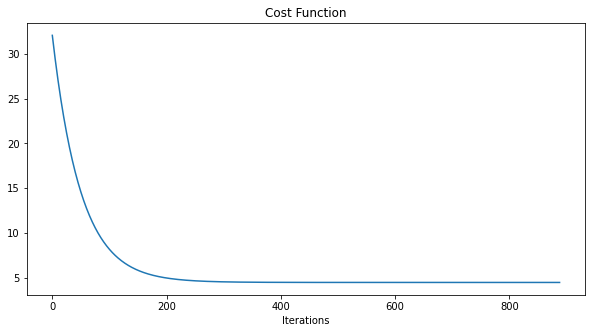

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(cost_hist.shape[0]), cost_hist)
plt.title("Cost Function")
plt.xlabel("Iterations")
plt.show()

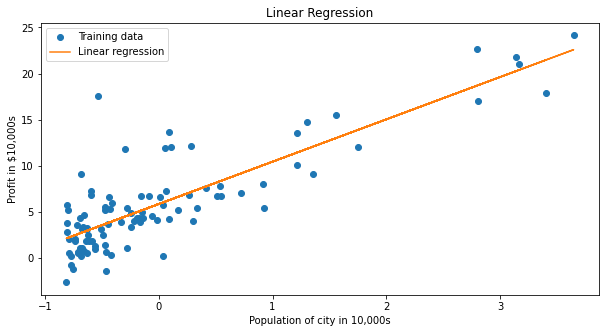

In [16]:
prediction_line = np.dot(X, final_theta)

plt.figure(figsize=(10, 5))
plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], prediction_line, '-')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(("Training data", "Linear regression"))
plt.title("Linear Regression")
plt.show()